# Linear Regrssion Example

## <span style="font-size:25px">Making a Training data</span>

In [ ]:
import pandas as pd
from collections import OrderedDict

data = OrderedDict( [('입력', [1, 5, 1, 3, 2, 4, -1, 4, 0, 2, 1, 0, 1, 0, 2]),
                     (''    , [2, 4, 2, 1, 4, 1, 3, 3, 2, 2, -2, 1, 1, 1, 3]),
                     (' '   , [0, 3, -1, 0, 2, 2, 2, 3, 6, 1, -2, 3, 3, 4, 3]),
                     ('출력', [-4, 4, -6, 3, -4, 9, -7, 5, 6, 0, 4, 3, 5, 5, 1])])
df = pd.DataFrame(data)
df

,입력,,,출력
0,1,2,0,-4
1,5,4,3,4
2,1,2,-1,-6
3,3,1,0,3
4,2,4,2,-4
5,4,1,2,9
6,-1,3,2,-7
7,4,3,3,5
8,0,2,6,6
9,2,2,1,0


## <span style="font-size:25px">Linear Regression - data generation</span>

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.17.1


In [ ]:
import numpy as np

x_data = df.iloc[:, :-1].to_numpy()   # pandas 구조를 numpy 배열로 바꾸는 작업
t_data = df.iloc[:, [-1]].to_numpy()   # to_numpy()대신 values를 사용해도 되지만,
                                          # to_numpy()가 더 명시적이다.
                                          # ExtensionArray를 사용 할 수 있다는 점이 차별점이자 장점이다.
print("train_data.shape =", x_data.shape, "test_data =", t_data.shape)

train_data.shape = (15, 3) test_data = (15, 1)


## <span style="font-size:25px">Linear Regression - building models, compiling models</span>

In [ ]:
# Building models
model = Sequential()

model.add(Dense(1, input_shape=(3,), activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

## <span style="font-size:25px">Linear Regression - trianing and predict</span>

In [ ]:
# Training
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 25.3792
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 23.7833
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 22.3438
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.0281
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.8161
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.6937
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.6507
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.6791
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.7721
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.9238
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.1295
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.3845
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.6850
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0274
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - l

In [55]:
# Predict
test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

rel_val = [ 2*i[0] + (-3)*i[1] + 2*i[2] for i in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print("===================")
print(rel_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[-4.9999213]
 [-3.0000238]
 [-4.0002007]
 [ 9.000231 ]
 [ 6.999878 ]]
[-5, -3, -4, 9, 7]


## <span style="font-size:25px">Linear Regression - weight, bias, and loss function trend</span>

In [57]:
print(model.inputs)    # input the model
print(model.outputs)   # output the model
print(model.weights)  # weight the model

[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_4>]
[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_5>]
[<KerasVariable shape=(3, 1), dtype=float32, path=sequential_2/dense_2/kernel>, <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_2/bias>]


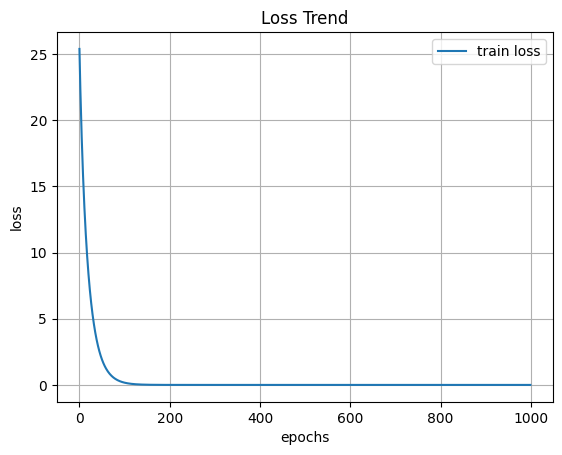

In [62]:
# model loss function trend
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')    # label(범례) 위치 지정(best는 그래프를 볼 때,
                          # 가장 최적인 장소를 택하도록 설정하게 해준다.)

plt.show()